In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import pathlib
import gc
gc.collect()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


9

In [2]:
x = np.load('../dados/Hypercellularity/13.1-final_dataset_200x200_axissumm/x.npy')
y = np.load('../dados/Hypercellularity/13.1-final_dataset_200x200_axissumm/y.npy')


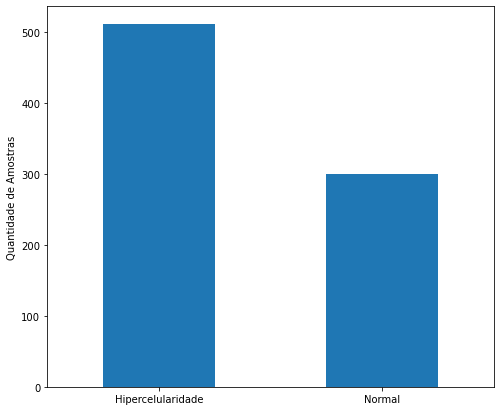

In [16]:
w, h = np.unique(y, return_counts=True)
freq_series = pd.Series(h)

x_labels = [
    'Hipercelularidade',
    'Normal'
]

# Plot the figure.
plt.figure(figsize=(8, 7))
ax = freq_series.plot(kind="bar")
ax.set_ylabel("Quantidade de Amostras")
ax.set_xticklabels(x_labels,rotation=0);

In [6]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [8]:
X_train.shape

(543, 4320)

In [10]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

clf = SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train.reshape(-1))
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Hiperceluraridade']))

main_path='../dados/Hypercellularity/'
saving_path = pathlib.Path(main_path +'/14.0-predictions_200x200')

saving_path.mkdir(parents=True, exist_ok=True)

np.save(str(saving_path)+ '/y_test_svc_linear', y_test)
np.save(str(saving_path)+ '/y_pred_svc_linear', y_pred_prob)

                   precision    recall  f1-score   support

           Normal       0.80      0.73      0.77       169
Hiperceluraridade       0.60      0.69      0.64        99

         accuracy                           0.72       268
        macro avg       0.70      0.71      0.70       268
     weighted avg       0.73      0.72      0.72       268



In [11]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train.reshape(-1))
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Hiperceluraridade']))

                   precision    recall  f1-score   support

           Normal       0.63      1.00      0.78       169
Hiperceluraridade       1.00      0.01      0.02        99

         accuracy                           0.63       268
        macro avg       0.82      0.51      0.40       268
     weighted avg       0.77      0.63      0.50       268



In [6]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train.reshape(-1))
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Hiperceluraridade']))

                   precision    recall  f1-score   support

           Normal       0.63      1.00      0.78       169
Hiperceluraridade       1.00      0.01      0.02        99

         accuracy                           0.63       268
        macro avg       0.82      0.51      0.40       268
     weighted avg       0.77      0.63      0.50       268



In [12]:

clf = SVC(kernel='linear', random_state=42)
scores = cross_val_score(clf, x, y.reshape(-1), cv=2)
scores

array([0.70935961, 0.6962963 ])

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [14]:
clf = MLPClassifier()
clf.fit(X_train, y_train.reshape(-1))
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

main_path='../dados/Hypercellularity/'
saving_path = pathlib.Path(main_path +'/14.0-predictions_200x200')

saving_path.mkdir(parents=True, exist_ok=True)

np.save(str(saving_path)+ '/y_test_mlp', y_test)
np.save(str(saving_path)+ '/y_pred_mlp', y_pred_prob)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Hiperceluraridade']))

                   precision    recall  f1-score   support

           Normal       0.71      0.81      0.76       169
Hiperceluraridade       0.57      0.43      0.49        99

         accuracy                           0.67       268
        macro avg       0.64      0.62      0.63       268
     weighted avg       0.66      0.67      0.66       268



In [16]:
del pca
del x_pac
gc.collect()

812

In [17]:
pca = PCA(n_components=2)
x_pac = pca.fit_transform(x)

In [18]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
x_pac.shape

[0.21370814 0.0308028 ]
[45.66682915 17.33745739]


(811, 2)

In [19]:
clf = MLPClassifier(random_state=42)
scores = cross_val_score(clf, x_pac, y.reshape(-1), cv=2)
scores

array([0.63546798, 0.68148148])